In [1]:
import pandas as pd
import numpy as np

# Load processed CSV file
input_csv = "./output/temporal_analysis_data.csv"
df = pd.read_csv(input_csv)

# Ensure required columns exist
required_columns = ["Location", "Area No.", "Yearly Average", "Year"]
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"❌ Missing required column: {col}")

# **Group by Location & Area No. to analyze trends**
grouped = df.groupby(["Location", "Area No."])["Yearly Average"].agg(
    min_level="min",
    max_level="max",
    avg_level="mean",
    change_2021_2024=lambda x: x.iloc[-1] - x.iloc[0] if len(x) == 4 else np.nan
).reset_index()

# Save insights to CSV
output_csv = "./output/location_based_groundwater_insights.csv"
grouped.to_csv(output_csv, index=False)

# **Print Summary**
print("\n📊 Groundwater Level Insights by Location:")
print(grouped.head())

print(f"\n✅ Insights saved to: {output_csv}")



📊 Groundwater Level Insights by Location:
                         Location Area No.  min_level  max_level  avg_level  \
0                 Adampakkam Part      XII   2.408167   3.953333   3.022292   
1  Adampakkam Part / Balaji Nagar      XII   3.488500   4.280000   3.879938   
2                      Adyar East     XIII   2.216667   3.434750   2.722146   
3                      Adyar West     XIII   2.570333   4.468750   3.214250   
4                  Agaram (North)       VI   2.111667   3.738583   2.632292   

   change_2021_2024  
0          1.105250  
1          0.314083  
2         -1.218083  
3         -1.712083  
4         -1.215250  

✅ Insights saved to: ./output/location_based_groundwater_insights.csv


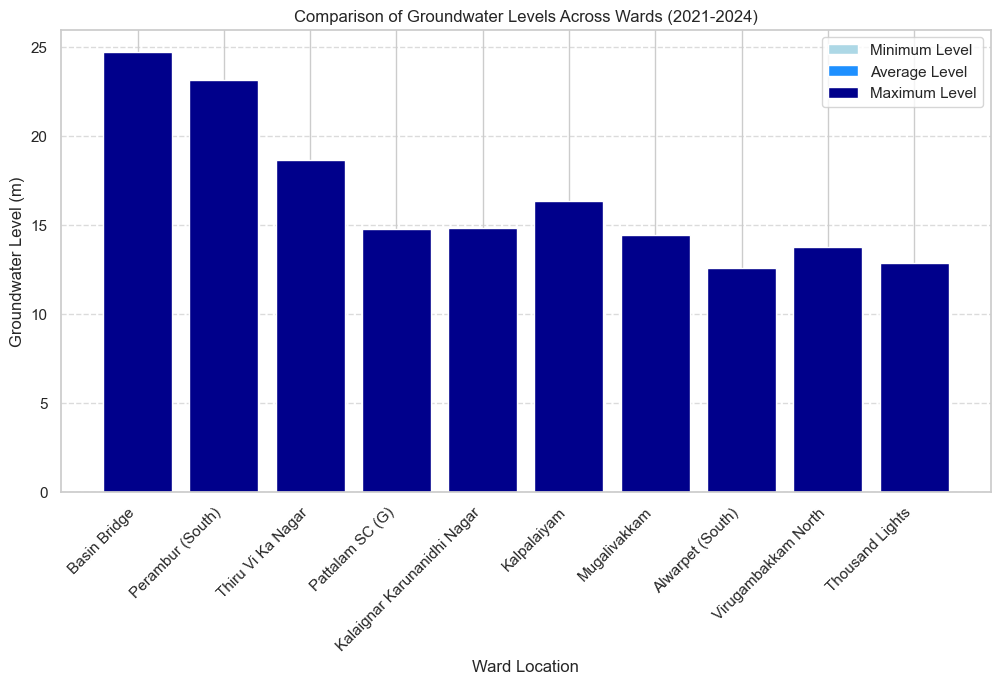

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_theme(style="whitegrid")

# Load the processed CSV file
df = pd.read_csv("./output/location_based_groundwater_insights.csv")

# Sort by average level and take the top 10 locations for clarity
df_top10 = df.sort_values("avg_level", ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
x_labels = df_top10["Location"]
x_pos = range(len(x_labels))

plt.bar(x_pos, df_top10["min_level"], color="lightblue", label="Minimum Level")
plt.bar(x_pos, df_top10["avg_level"], color="dodgerblue", label="Average Level")
plt.bar(x_pos, df_top10["max_level"], color="darkblue", label="Maximum Level")

plt.xlabel("Ward Location")
plt.ylabel("Groundwater Level (m)")
plt.title("Comparison of Groundwater Levels Across Wards (2021-2024)")
plt.xticks(x_pos, x_labels, rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save figure
plt.savefig("output/Groundwater_Comparison_BarChart.png", dpi=300, bbox_inches="tight")
plt.show()


C:\Users\rumma\AppData\Local\Temp\ipykernel_15444\269667376.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_change, x="Location", y="change_2021_2024", palette="coolwarm")


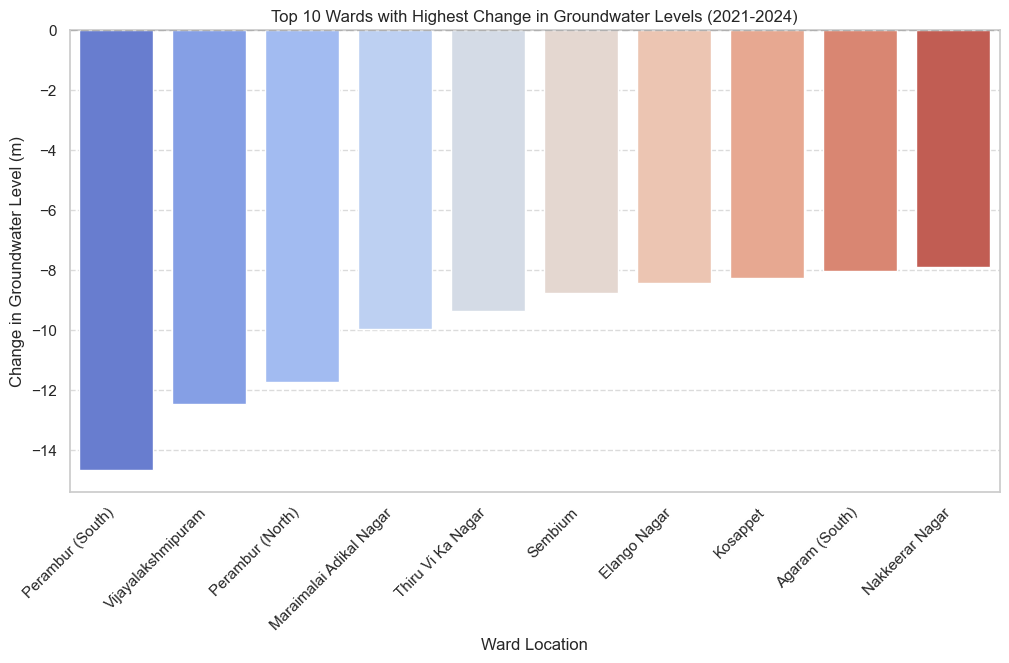

In [3]:
# Filter locations with highest absolute change (both positive and negative)
df_top_change = df.sort_values("change_2021_2024", key=abs, ascending=False).head(10)

# Plot line chart for change in groundwater levels
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top_change, x="Location", y="change_2021_2024", palette="coolwarm")

plt.xlabel("Ward Location")
plt.ylabel("Change in Groundwater Level (m)")
plt.title("Top 10 Wards with Highest Change in Groundwater Levels (2021-2024)")
plt.xticks(rotation=45, ha="right")
plt.axhline(0, color="black", linestyle="--")  # Reference line at 0
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save figure
plt.savefig("output/Groundwater_Change_BarChart.png", dpi=300, bbox_inches="tight")
plt.show()
